Catherine Carmosino

11/1/2025-11/3/2025

Referring to `Python_exploring_h5ad_files.ipynb` and the [Scanpy Preprocessing and clustering tutorial](https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#nearest-neighbor-graph-construction-and-visualization).

In [1]:
# Core libraries
import hisepy
import scanpy as sc
import anndata as ad
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/leidenalg/VertexPartition.py:413: SyntaxWarning: invalid escape sequence '\m'
  .. math:: Q = \\frac{1}{m} \\sum_{ij} \\left(A_{ij} - \\frac{k_i^\mathrm{out} k_j^\mathrm{in}}{m} \\right)\\delta(\\sigma_i, \\sigma_j),
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/leidenalg/VertexPartition.py:788: SyntaxWarning: invalid escape sequence '\m'
  .. math:: Q = \\sum_{ij} \\left(A_{ij} - \\gamma \\frac{k_i^\mathrm{out} k_j^\mathrm{in}}{m} \\right)\\delta(\\sigma_i, \\sigma_j),
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/leidenalg/Optimiser.py:27: SyntaxWarning: invalid escape sequence '\g'
  implementation therefore does not guarantee subpartition :math:`\gamma`-density.
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/leidenalg/Optimiser.py:346: SyntaxWarning: invalid escape sequence '\s'
  .. math:: Q = \sum_k \\lambda_k Q_k.


# Read in .h5ad files in our File Set

In [2]:
h5ad_files = hisepy.cache_fileset('f48bf688-1a5f-456c-b0b0-c6ec870ec003')

In [3]:
# view the first five file names
h5ad_files[0:5]

['/home/workspace/input/1784782472/fileset/f48bf688-1a5f-456c-b0b0-c6ec870ec003/rhodium-niobium-silver/Afatinib_BIBW2992_counts_filtered_labeled_sampled.h5ad',
 '/home/workspace/input/1784782472/fileset/f48bf688-1a5f-456c-b0b0-c6ec870ec003/rhodium-niobium-silver/Afatinib_dimaleate_counts_filtered_labeled_sampled.h5ad',
 '/home/workspace/input/1784782472/fileset/f48bf688-1a5f-456c-b0b0-c6ec870ec003/rhodium-niobium-silver/Baricitinib_LY3009104_INCB028050_counts_filtered_labeled_sampled.h5ad',
 '/home/workspace/input/1784782472/fileset/f48bf688-1a5f-456c-b0b0-c6ec870ec003/rhodium-niobium-silver/Baricitinib_phosphate_counts_filtered_labeled_sampled.h5ad',
 '/home/workspace/input/1784782472/fileset/f48bf688-1a5f-456c-b0b0-c6ec870ec003/rhodium-niobium-silver/Canertinib_CI-1033_counts_filtered_labeled_sampled.h5ad']

In [4]:
# initialize a list
adata_list = []

# iterate over the list h5ad_files to use Scanpy to read the file
for h5ad_file in h5ad_files:
    adata = sc.read_h5ad(h5ad_file)
    # append anndata file object into the list
    adata_list.append(adata)

In [5]:
# view the first item of the list
adata_list[0]

AnnData object with n_obs × n_vars = 25000 × 1916
    obs: 'original_barcodes', 'batch_id', 'pool_id', 'chip_id', 'well_id', 'n_umis', 'n_genes', 'plate_location', 'cyto_treatment', 'drug_treatment', 'drug_name', 'drug_cas_number', 'drug_mw', 'drug_solvent', 'drug_pathway', 'drug_target', 'drug_description', 'drug_chembl_name', 'drug_chembl_id', 'AIFI_L1', 'AIFI_L2', 'leiden_2'
    uns: 'drug_name_colors', 'leiden_2', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
# using anndata to concatenate: code chunk from Scanpy tutorial

# combine multiple anndata objects and adds a "sample" column telling you which dataset each cell came from; aka, which DRUG NAME each cell was treated with!
adata = ad.concat(adata_list, label="sample")

# make sure all observations are unique
adata.obs_names_make_unique()

# show how many cells there are per sample, or per drug name!
print(adata.obs["sample"].value_counts())
print(adata.obs["drug_name"].value_counts())

adata

/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/anndata/_core/merge.py:1667: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_annot = pd.concat(


sample
0     25000
1     25000
2     25000
3     25000
4     25000
5     25000
6     25000
7     25000
8     25000
9     25000
10    25000
11    25000
12    25000
13    25000
14    25000
15    25000
16    25000
17    25000
Name: count, dtype: int64
drug_name
Afatinib (BIBW2992)                    25000
Afatinib dimaleate                     25000
Baricitinib (LY3009104, INCB028050)    25000
Baricitinib phosphate                  25000
Canertinib (CI-1033)                   25000
Canertinib dihydrochloride             25000
DMSO Control                           25000
Erlotinib                              25000
Erlotinib Hydrochloride                25000
Gefitinib (ZD1839)                     25000
Gefitinib hydrochloride                25000
IL6 Control                            25000
NVP-BSK805                             25000
NVP-BSK805 2HCl                        25000
Ruxolitinib (INCB018424)               25000
Ruxolitinib phosphate                  25000
Tofacitinib (CP-69055

AnnData object with n_obs × n_vars = 450000 × 1916
    obs: 'original_barcodes', 'batch_id', 'pool_id', 'chip_id', 'well_id', 'n_umis', 'n_genes', 'plate_location', 'cyto_treatment', 'drug_treatment', 'drug_name', 'drug_cas_number', 'drug_mw', 'drug_solvent', 'drug_pathway', 'drug_target', 'drug_description', 'drug_chembl_name', 'drug_chembl_id', 'AIFI_L1', 'AIFI_L2', 'leiden_2', 'sample'
    obsm: 'X_pca', 'X_umap'

From running `ad.concat()` like in the Scanpy tutorial, I saw how many cells there are per sample-- and it was all-around 25,000 cells per sample.

In [7]:
# len(adata_list) for how many files are in the list: 18, for 8 drugs with 2 formulas each and 2 controls
len(adata_list)

18

**The data contains 25,000 cells per sample, 18 samples (for 8 drugs with 2 formulas each and 2 controls), 450,000 observations (total cells), and 1,916 measured genes.**

# Let's keep exploring adata!

In [8]:
# create a copy of adata
obs = adata.obs.copy()

### Notes on exploring adata:

Use `.obs`to explore the data more by pulling out the columns you need and getting the counts!

For example: `adata.obs[['drug_name']].value_counts()` gives us information about the drug treatments (drug names).
- Some drugs have 50000 counts instead of 25000-- those probably point at duplicates of the same drug.
- I get the exact same thing with `adata.obs[['sample']].value_counts()`.

You can replace 'drug_name' with other columns from adata that gives more information about each drug, such as 'drug_cas_number', 'drug_solvent', 'drug_pathway', 'drug_target', 'drug_description', 'drug_chembl_name or id'

Another example: `adata.obs[[‘AIFI_L2’]].value_counts()` gives us information about AIFI_L1 or AIFI_L2.
- AIFI_L1 and AIFI_L2 are information about the cell type / T cells, the L2 is what we will be using more (more specific) while L1 is more of a broad overview 


In [9]:
# 18 drug names, for 8 drugs with 2 formulas each and 2 controls
obs[['drug_name']].value_counts()

drug_name                          
Afatinib (BIBW2992)                    25000
Afatinib dimaleate                     25000
Baricitinib (LY3009104, INCB028050)    25000
Baricitinib phosphate                  25000
Canertinib (CI-1033)                   25000
Canertinib dihydrochloride             25000
DMSO Control                           25000
Erlotinib                              25000
Erlotinib Hydrochloride                25000
Gefitinib (ZD1839)                     25000
Gefitinib hydrochloride                25000
IL6 Control                            25000
NVP-BSK805                             25000
NVP-BSK805 2HCl                        25000
Ruxolitinib (INCB018424)               25000
Ruxolitinib phosphate                  25000
Tofacitinib (CP-690550) Citrate        25000
Tofacitinib (CP-690550,Tasocitinib)    25000
Name: count, dtype: int64

In [10]:
obs[['drug_name', 'drug_treatment', 'drug_description']].value_counts()

drug_name                            drug_treatment  drug_description                                 
Afatinib (BIBW2992)                  A8247           Irreversible EGFR/HER2 inhibitor                     25000
Afatinib dimaleate                   A3145           EGFR inhibitor                                       25000
Baricitinib (LY3009104, INCB028050)  A4141           JAK1/JAK2 inhibitor,selective orally bioavailable    25000
Baricitinib phosphate                A3222           JAK1/JAK2 inhibitor                                  25000
Canertinib (CI-1033)                 A1845           HER family tyrosine kinase inhibitor                 25000
Canertinib dihydrochloride           A3276           Pan-ErbB inhibitor, potent and selective             25000
Erlotinib                            A3397           EGFR tyrosine kinase inhibitor                       25000
Erlotinib Hydrochloride              A8234           Selective EGFR inhibitor                             25000
G

In [11]:
obs[['AIFI_L2']].value_counts()

AIFI_L2            
CD4 Naive              118058
CD4 Central Memory     107272
CD8 Naive               78553
CD4 Effector Memory     49677
CD8 Effector Memory     39593
CD8 Central Memory      25655
Treg                    22905
MAIT                     8262
CD8aa                      25
Name: count, dtype: int64

**Out of the cell labels (from the 'AIFI_L2' column) the CD8aa is SIGNIFICANTLY less annotated than the other cells.**

# Examine the cell labels in the cell metadata (adata.obs['AIFI_L2']) to see if any labels are underrepresented in any of the drug treatments.

**Pull out the column `AIFI_L2` for cell type labels, and the column `drug_name` for drug treatments.**

In [12]:
count_types_per_treatment2 = obs[['drug_treatment', 'AIFI_L2']].value_counts()

# convert to a dataframe
count_df2 = pd.DataFrame(count_types_per_treatment2)
count_df2

count
drug_treatment AIFI_L2                  
DMSO           CD4 Naive           13256
               CD4 Central Memory  11683
               CD8 Naive            8831
A3397          CD4 Naive            7335
A3145          CD4 Naive            6949
...                                  ...
A3397          CD8aa                   1
A3781          CD8aa                   1
A4141          CD8aa                   1
A8234          CD8aa                   1
A8219          CD8aa                   1

[146 rows x 1 columns]

In [13]:
count_types_per_treatment = obs[['drug_name', 'AIFI_L2']].value_counts()
count_types_per_treatment

# convert to a dataframe
count_df = pd.DataFrame(count_types_per_treatment)
count_df

# for just dividing by the maximum value
count_df['normalized_count'] = count_df.groupby('AIFI_L2', observed=False).transform(lambda x: x / max(x))

# for rescaling so min = 0 and max = 1
# count_df['rescaled_count'] = count_df.groupby('AIFI_L2').transform(lambda x: (x - min(x))/(max(x) - min(x)))

## Bar plot to see if any cell labels are underrepresented:

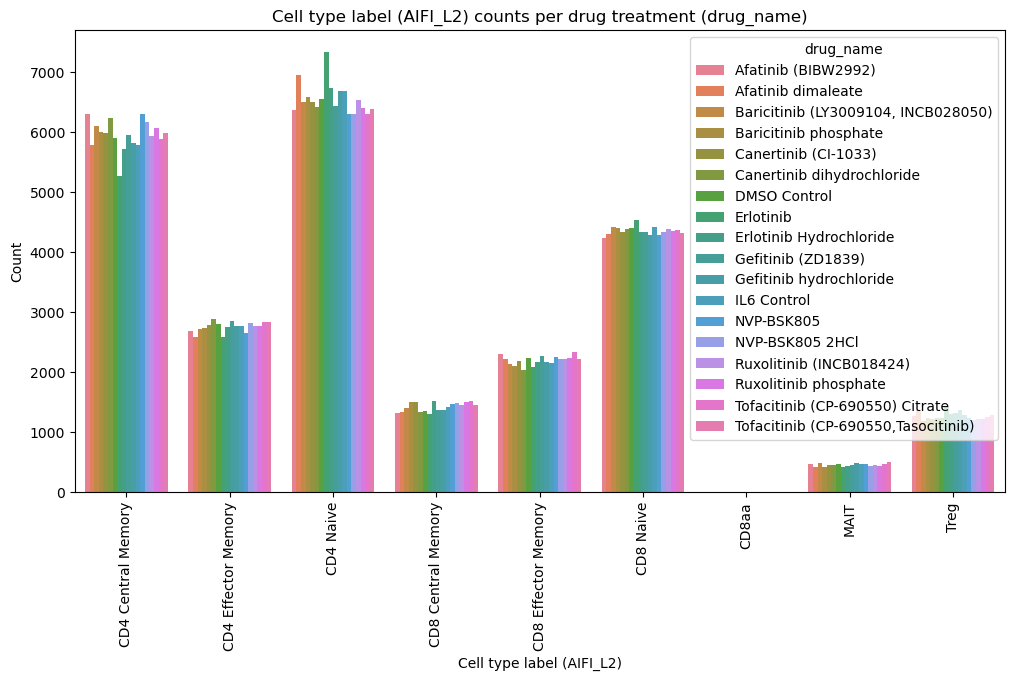

In [14]:
# bar plot:
# x-axis is cell type labels AIFI_L2
# y-axis is count
# hue, what we're grouping by, is drug_name

plt.figure(figsize = (12, 6))
sns.barplot(data = count_df, x = "AIFI_L2", y = "count", hue = "drug_name")
plt.xticks(rotation = 90)
plt.title("Cell type label (AIFI_L2) counts per drug treatment (drug_name)")
plt.xlabel("Cell type label (AIFI_L2)")
plt.ylabel("Count")
plt.show()

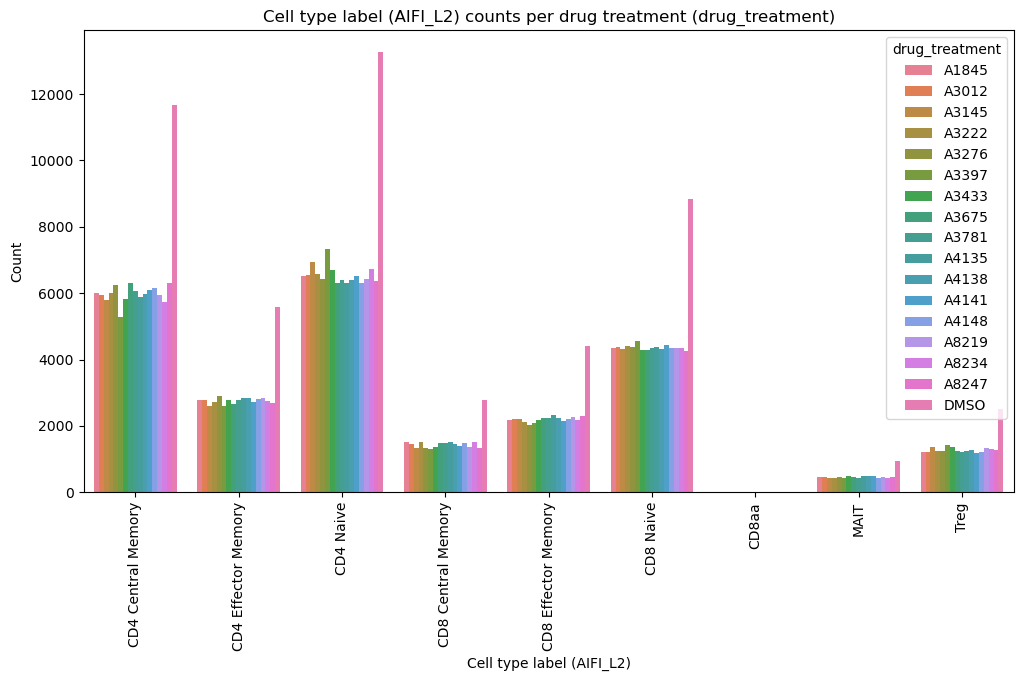

In [15]:
# bar plot:
# x-axis is cell type labels AIFI_L2
# y-axis is count
# hue, what we're grouping by, is drug_treatment

plt.figure(figsize = (12, 6))
sns.barplot(data = count_df2, x = "AIFI_L2", y = "count", hue = "drug_treatment")
plt.xticks(rotation = 90)
plt.title("Cell type label (AIFI_L2) counts per drug treatment (drug_treatment)")
plt.xlabel("Cell type label (AIFI_L2)")
plt.ylabel("Count")
plt.show()

**It seems like the cell label "CD8aa" is underrepresented as well as MAIT and Treg.**

## Heatmap to see if any cell labels are underrepresented:

In [16]:
# heatmap: requires a matrix.

# convert dataframe to a matrix:
# "index" will be the rows of the heatmap (the 18 drug treatments (drug_names))
# "columns" will be the columns (the cell labels (AIFI_L2))
# "values" will determine the color intensity (count)
    # aggfunc: apply sum() function to aggregate the "values" (count) by
count_pivot = count_df.pivot_table(
    index = "drug_name",
    columns = "AIFI_L2",
    values = "count",
    aggfunc = "sum",
    fill_value = 0
)

count_pivot

/tmp/ipykernel_1558/2815048158.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  count_pivot = count_df.pivot_table(


AIFI_L2                              CD4 Central Memory  CD4 Effector Memory  \
drug_name                                                                      
Afatinib (BIBW2992)                                6312                 2695   
Afatinib dimaleate                                 5793                 2596   
Baricitinib (LY3009104, INCB028050)                6107                 2727   
Baricitinib phosphate                              6005                 2732   
Canertinib (CI-1033)                               5994                 2785   
Canertinib dihydrochloride                         6237                 2891   
DMSO Control                                       5899                 2808   
Erlotinib                                          5268                 2591   
Erlotinib Hydrochloride                            5721                 2763   
Gefitinib (ZD1839)                                 5952                 2856   
Gefitinib hydrochloride                            5823                 2779   
IL6 Control                                        5784                 2765   
NVP-BSK805                                         6312                 2649   
NVP-BSK805 2HCl                                    6168                 2824   
Ruxolitinib (INCB018424)                           5941                 2767   
Ruxolitinib phosphate                              6079                 2771   
Tofacitinib (CP-690550) Citrate                    5889                 2845   
Tofacitinib (CP-690550,Tasocitinib)                5988                 2833   

AIFI_L2                              CD4 Naive  CD8 Central Memory  \
drug_name                                                            
Afatinib (BIBW2992)                       6370                1324   
Afatinib dimaleate                        6949                1337   
Baricitinib (LY3009104, INCB028050)       6510                1405   
Baricitinib phosphate                     6583                1508   
Canertinib (CI-1033)                      6512                1502   
Canertinib dihydrochloride                6424                1333   
DMSO Control                              6564                1356   
Erlotinib                                 7335                1311   
Erlotinib Hydrochloride                   6739                1523   
Gefitinib (ZD1839)                        6433                1366   
Gefitinib hydrochloride                   6692                1378   
IL6 Control                               6692                1418   
NVP-BSK805                                6314                1473   
NVP-BSK805 2HCl                           6309                1493   
Ruxolitinib (INCB018424)                  6535                1463   
Ruxolitinib phosphate                     6404                1501   
Tofacitinib (CP-690550) Citrate           6303                1515   
Tofacitinib (CP-690550,Tasocitinib)       6390                1449   

AIFI_L2                              CD8 Effector Memory  CD8 Naive  CD8aa  \
drug_name                                                                    
Afatinib (BIBW2992)                                 2311       4247      2   
Afatinib dimaleate                                  2216       4312      1   
Baricitinib (LY3009104, INCB028050)                 2140       4429      1   
Baricitinib phosphate                               2105       4406      1   
Canertinib (CI-1033)                                2192       4344      0   
Canertinib dihydrochloride                          2040       4384      0   
DMSO Control                                        2241       4400     13   
Erlotinib                                           2095       4546      1   
Erlotinib Hydrochloride                             2171       4344      1   
Gefitinib (ZD1839)                                  2271       4337      1   
Gefitinib hydrochloride                             2165      

In [17]:
# and making another one for normalized counts
norm_count_pivot = count_df.pivot_table(
    observed=False,
    index = "drug_name",
    columns = "AIFI_L2",
    values = "normalized_count",
    aggfunc = "sum",
    fill_value = 0
)

norm_count_pivot

AIFI_L2                              CD4 Central Memory  CD4 Effector Memory  \
drug_name                                                                      
Afatinib (BIBW2992)                            1.000000             0.932203   
Afatinib dimaleate                             0.917776             0.897959   
Baricitinib (LY3009104, INCB028050)            0.967522             0.943272   
Baricitinib phosphate                          0.951362             0.945002   
Canertinib (CI-1033)                           0.949620             0.963334   
Canertinib dihydrochloride                     0.988118             1.000000   
DMSO Control                                   0.934569             0.971290   
Erlotinib                                      0.834601             0.896230   
Erlotinib Hydrochloride                        0.906369             0.955725   
Gefitinib (ZD1839)                             0.942966             0.987893   
Gefitinib hydrochloride                        0.922529             0.961259   
IL6 Control                                    0.916350             0.956416   
NVP-BSK805                                     1.000000             0.916292   
NVP-BSK805 2HCl                                0.977186             0.976825   
Ruxolitinib (INCB018424)                       0.941223             0.957108   
Ruxolitinib phosphate                          0.963086             0.958492   
Tofacitinib (CP-690550) Citrate                0.932985             0.984089   
Tofacitinib (CP-690550,Tasocitinib)            0.948669             0.979938   

AIFI_L2                              CD4 Naive  CD8 Central Memory  \
drug_name                                                            
Afatinib (BIBW2992)                   0.868439            0.869337   
Afatinib dimaleate                    0.947376            0.877873   
Baricitinib (LY3009104, INCB028050)   0.887526            0.922521   
Baricitinib phosphate                 0.897478            0.990151   
Canertinib (CI-1033)                  0.887798            0.986211   
Canertinib dihydrochloride            0.875801            0.875246   
DMSO Control                          0.894888            0.890348   
Erlotinib                             1.000000            0.860801   
Erlotinib Hydrochloride               0.918746            1.000000   
Gefitinib (ZD1839)                    0.877028            0.896914   
Gefitinib hydrochloride               0.912338            0.904793   
IL6 Control                           0.912338            0.931057   
NVP-BSK805                            0.860804            0.967170   
NVP-BSK805 2HCl                       0.860123            0.980302   
Ruxolitinib (INCB018424)              0.890934            0.960604   
Ruxolitinib phosphate                 0.873074            0.985555   
Tofacitinib (CP-690550) Citrate       0.859305            0.994747   
Tofacitinib (CP-690550,Tasocitinib)   0.871166            0.951412   

AIFI_L2                              CD8 Effector Memory  CD8 Naive     CD8aa  \
drug_name                                                                       
Afatinib (BIBW2992)                             0.987607   0.934228  0.153846   
Afatinib dimaleate                              0.947009   0.948526  0.076923   
Baricitinib (LY3009104, INCB028050)             0.914530   0.974263  0.076923   
Baricitinib phosphate                           0.899573   0.969204  0.076923   
Canertinib (CI-1033)                            0.936752   0.955565  0.000000   
Canertinib dihydrochloride                      0.871795   0.964364  0.000000   
DMSO Control                                    0.957692   0.967884  1.000000   
Erlotinib                                       0.895299   1.000000  0.076923   
Erlotinib Hydrochloride                         0.927778   0.955565  0.076923   
Gefitinib (ZD1839)                              0.970513   0.954026  0.076923   
Gefitinib hydrochloride   

In [18]:
count_pivot2 = count_df2.pivot_table(
    observed=False,
    index = "drug_treatment",
    columns = "AIFI_L2",
    values = "count",
    aggfunc = "sum",
    fill_value = 0
)

# count_pivot2

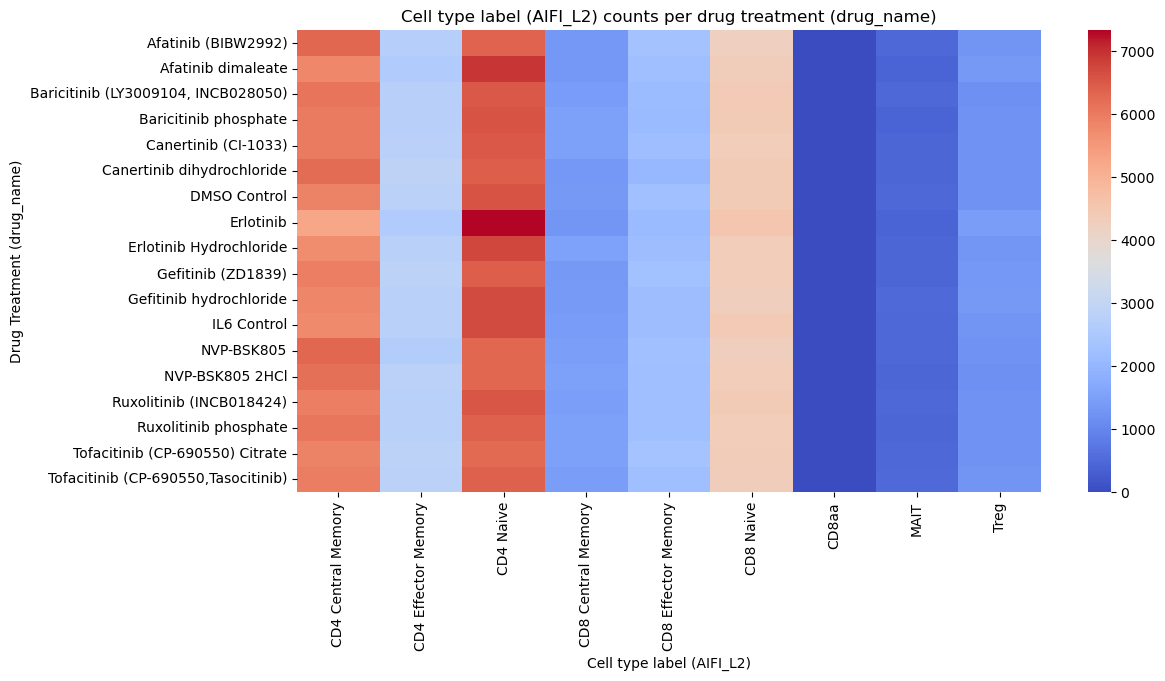

In [19]:
plt.figure(figsize = (12, 6))
sns.heatmap(data = count_pivot, cmap = "coolwarm")
plt.xticks(rotation = 90)
plt.title("Cell type label (AIFI_L2) counts per drug treatment (drug_name)")
plt.xlabel("Cell type label (AIFI_L2)")
plt.ylabel("Drug Treatment (drug_name)")
plt.show()

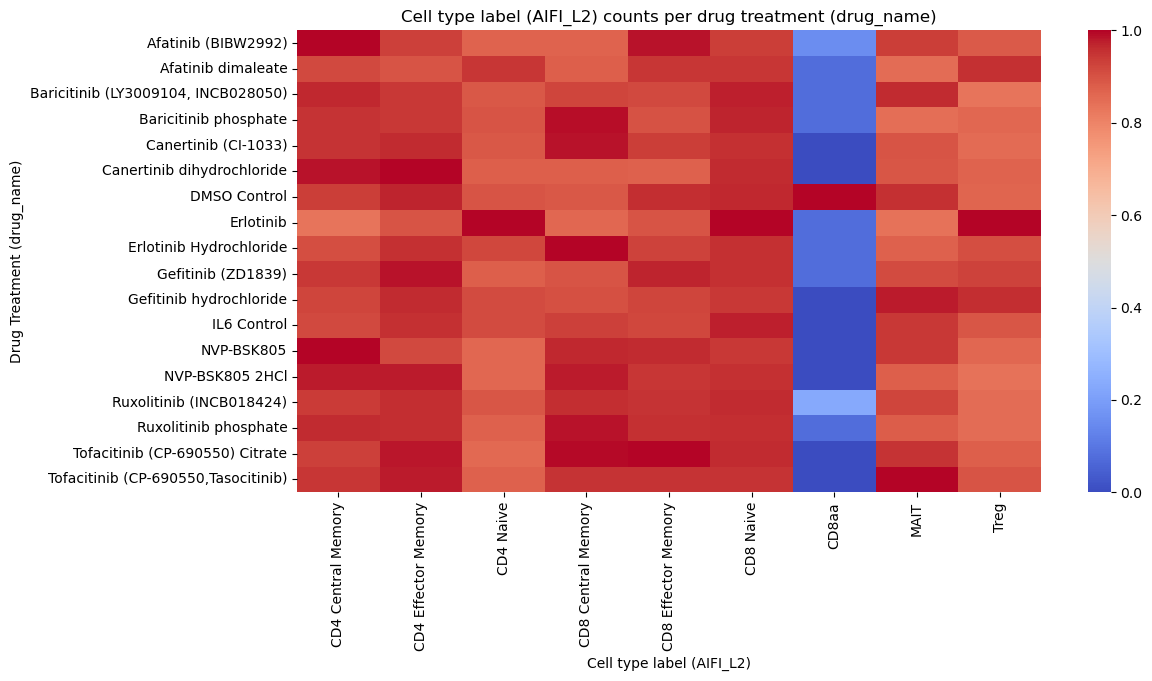

In [20]:
plt.figure(figsize = (12, 6))
sns.heatmap(data = norm_count_pivot, cmap = "coolwarm")
plt.xticks(rotation = 90)
plt.title("Cell type label (AIFI_L2) counts per drug treatment (drug_name)")
plt.xlabel("Cell type label (AIFI_L2)")
plt.ylabel("Drug Treatment (drug_name)")
plt.show()

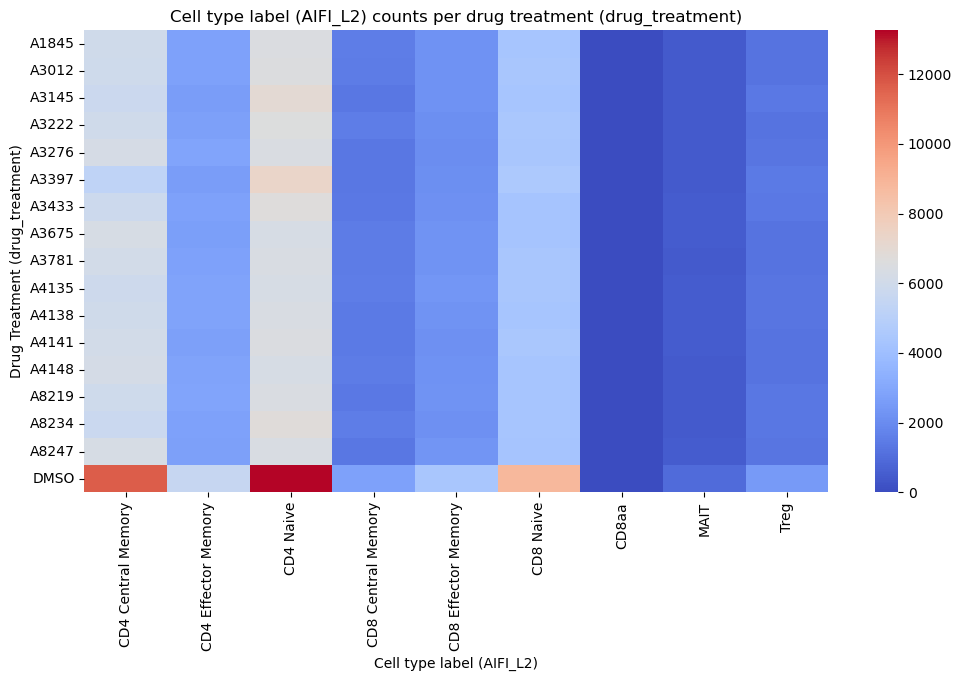

In [21]:
plt.figure(figsize = (12, 6))
sns.heatmap(data = count_pivot2, cmap = "coolwarm")
plt.xticks(rotation = 90)
plt.title("Cell type label (AIFI_L2) counts per drug treatment (drug_treatment)")
plt.xlabel("Cell type label (AIFI_L2)")
plt.ylabel("Drug Treatment (drug_treatment)")
plt.show()

**Again, it seems like the cell labels CD8aa, MAIT, Treg, and possibly CD8 Central Memory are underpresented.**

# Scanpy Preprocessing, Dimensionality Reduction & Clustering

## Normalization

In [22]:
# Normalizing to median total counts
sc.pp.normalize_total(adata, target_sum = 1e4)

# Logarithmize the data
sc.pp.log1p(adata)


#sc.pp.scale(adata)
#this was causing issues, the sc.pp.highly_variable_genes runs on normalized, log-transformed, unscaled data.

## Feature Selection

`pp.highly_variable_genes` annotates highly variable genes.

### Selecting only top 500 genes

In [23]:
sc.pp.highly_variable_genes(adata, n_top_genes=500, batch_key="sample") 

In [24]:
#checking to see how many highly variable genes were selected 
print(f"Number of highly variable genes: {adata.var['highly_variable'].sum()}")

Number of highly variable genes: 500


**Good check to know that the n_top_genes actually gives us 500 genes**

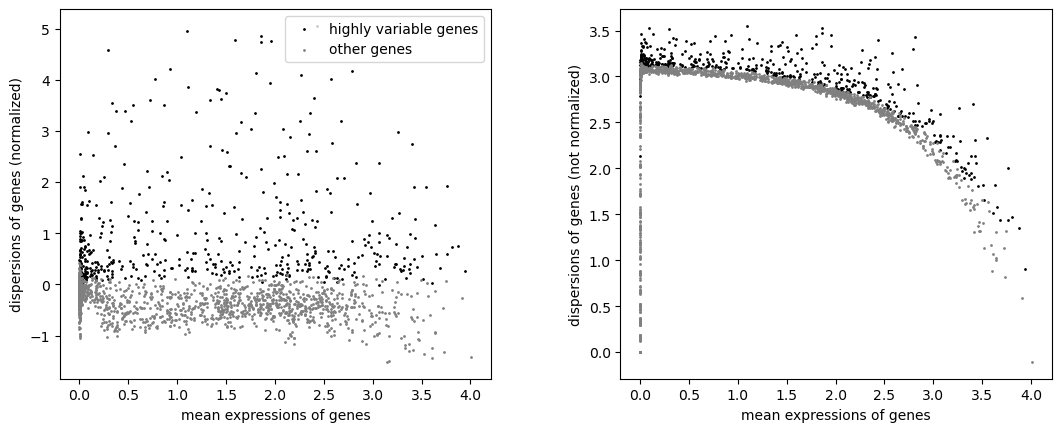

In [25]:
sc.pl.highly_variable_genes(adata)

In [26]:
#trying to get highly variable genes by using parameters
sc.pp.highly_variable_genes(adata, min_mean=0.0125, min_disp=0.1, batch_key="sample")

In [27]:
#checking to see how many highly variable genes were selected 
print(f"Number of highly variable genes: {adata.var['highly_variable'].sum()}")

Number of highly variable genes: 410


**Looks like with these parameters (min mean and mean dispersion) there are a good amount of highly variable genes: 410**

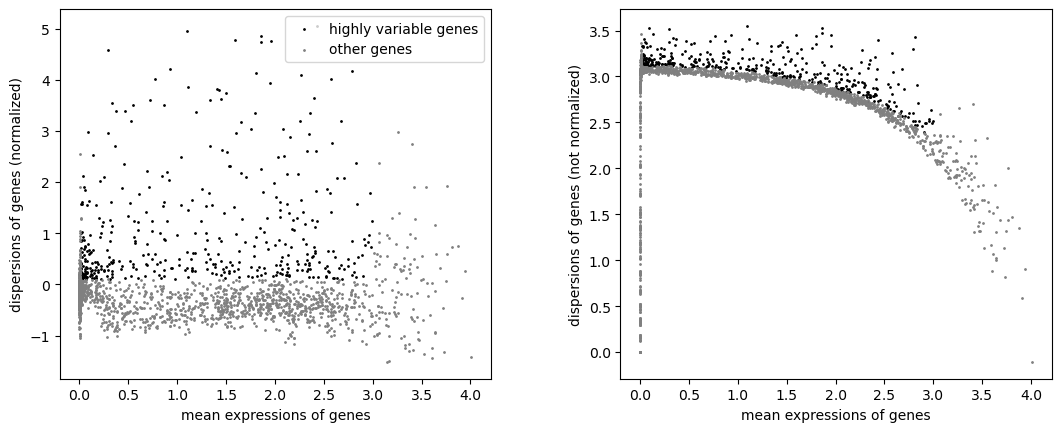

In [28]:
sc.pl.highly_variable_genes(adata)

In [29]:
#keeping only the highly variable genes
adata = adata[:, adata.var.highly_variable].copy()

In [30]:
#scaling the data
sc.pp.scale(adata, max_value=10)

/home/workspace/environment/pythonscrna12/lib/python3.13/functools.py:934: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


## Dimensionality Reduction: PCA, UMAPs

In [31]:
# Reduce the dimensionality of the data by running principal component analysis (PCA)
sc.tl.pca(adata)

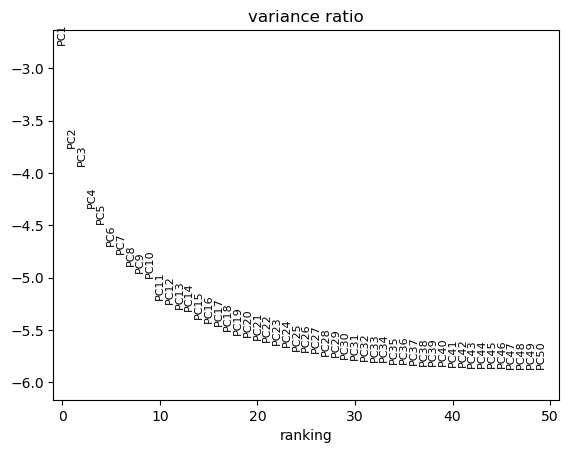

In [32]:
#plotting the pcas
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

From Scanpy tutorial: "You can also plot the principal components to see if there are any potentially undesired features (e.g. batch, QC metrics) driving signifigant variation in this dataset."

**QUESTION ABOUT INTERPRETATION: is `sample` just `drug_name`? I'm pretty sure.: Check for batch effects:**

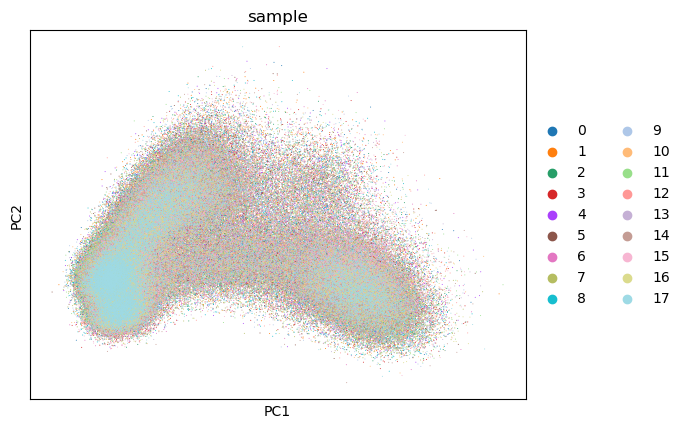

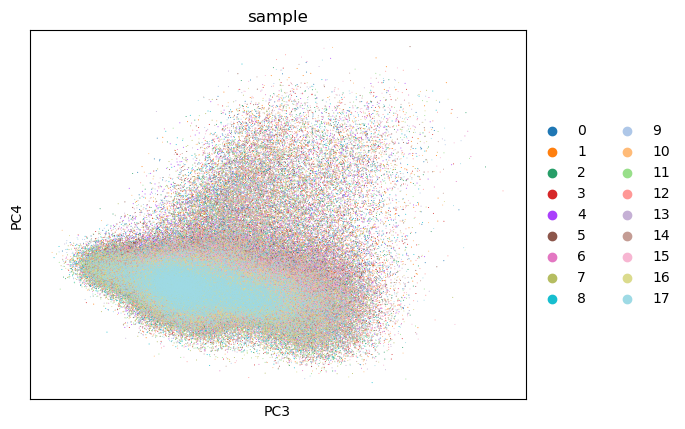

In [33]:
sc.pl.pca(
    adata,
    color = ["sample"],
    dimensions=[(0, 1)],
    ncols=2,
    size=2
)

sc.pl.pca(
    adata,
    color = ["sample"],
    dimensions=[(2, 3)],
    ncols=2,
    size=2
)

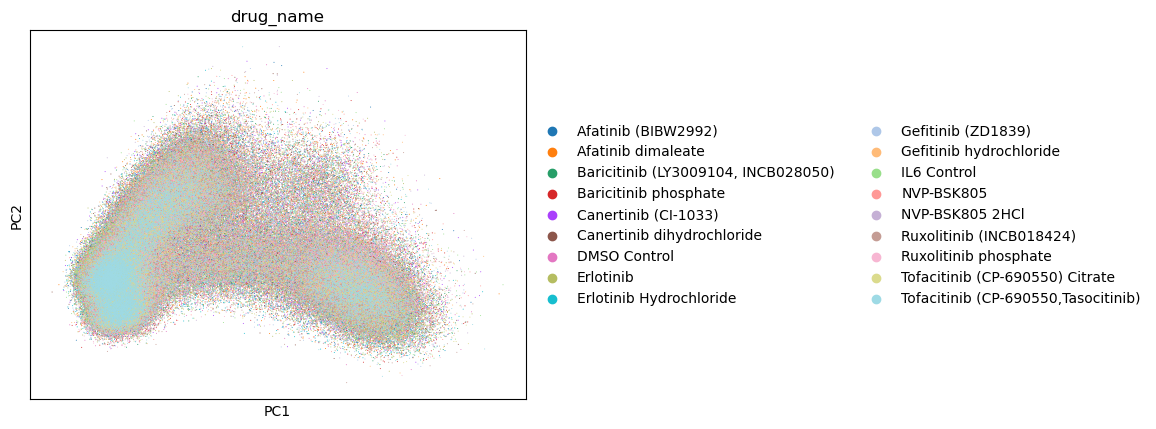

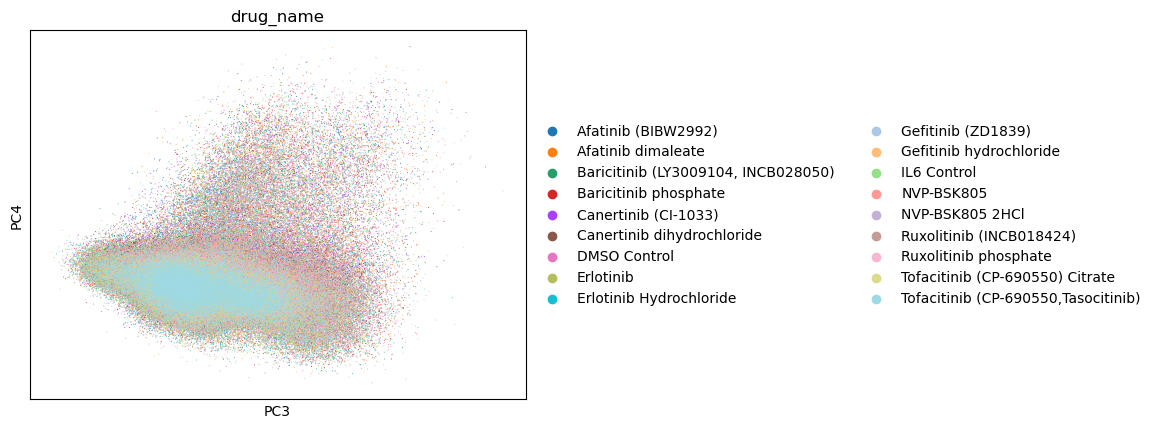

In [34]:
sc.pl.pca(
    adata,
    color = ["drug_name"],
    dimensions=[(0, 1)],
    ncols=2,
    size=2
)

sc.pl.pca(
    adata,
    color = ["drug_name"],
    dimensions=[(2, 3)],
    ncols=2,
    size=2
)

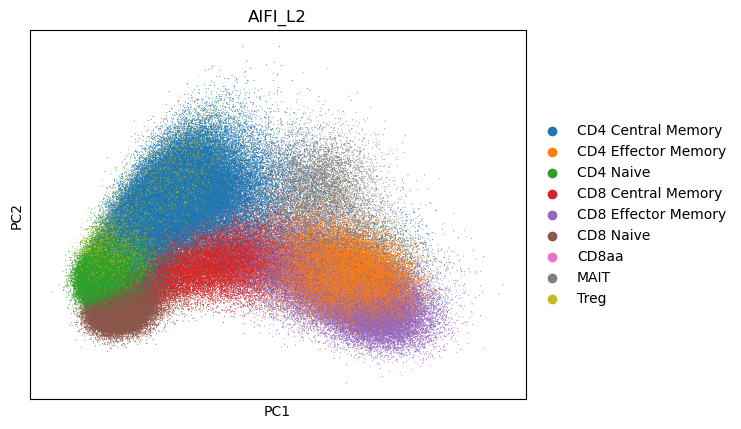

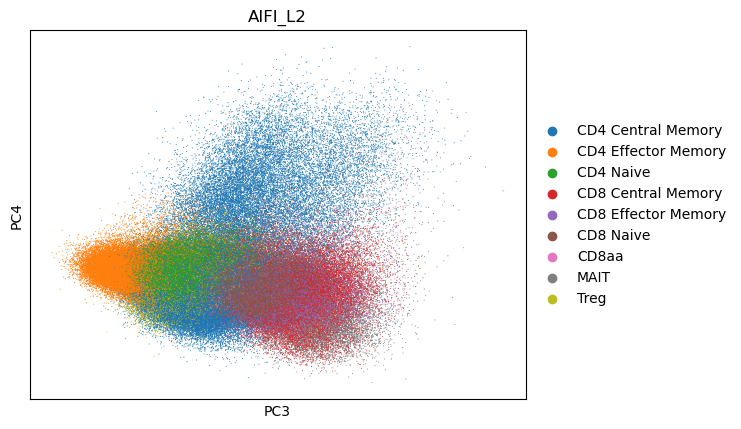

In [35]:
sc.pl.pca(
    adata,
    color = ["AIFI_L2"],
    dimensions=[(0, 1)],
    ncols=2,
    size=2
)

sc.pl.pca(
    adata,
    color = ["AIFI_L2"],
    dimensions=[(2, 3)],
    ncols=2,
    size=2
)

### Nearest neighbor graph construction and visualization: UMAP!

In [36]:
sc.pp.neighbors(adata) #n_neighbors=15, n_pcs=30

In [37]:
sc.tl.umap(adata)

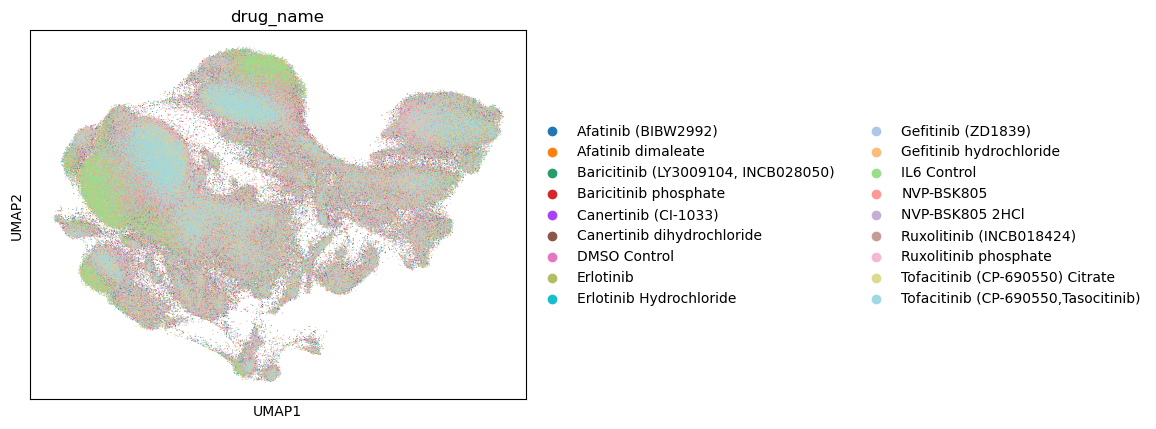

In [38]:
sc.pl.umap(
    adata,
    color="drug_name",
    size=2,
)

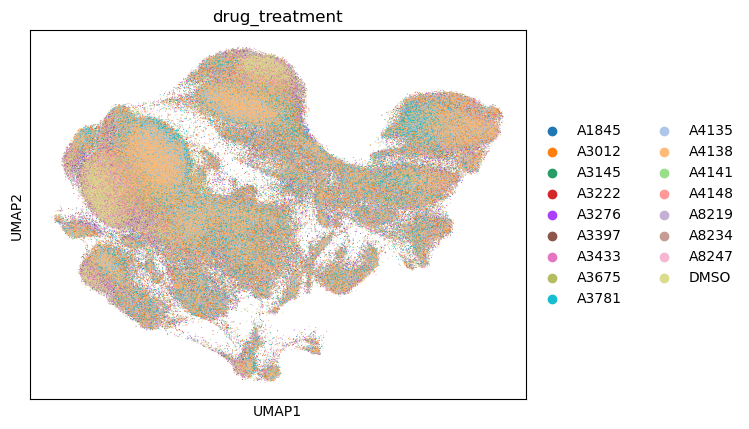

In [59]:
sc.pl.umap(
    adata,
    color="drug_treatment",
    size=2,
)

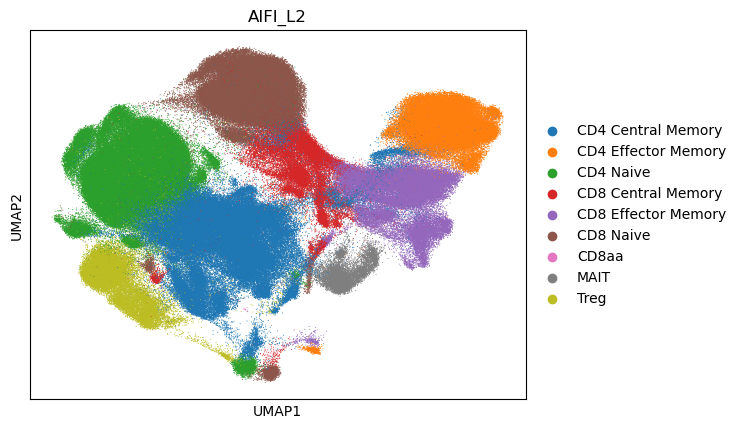

In [39]:
sc.pl.umap(
    adata,
    color="AIFI_L2",
    size=2,
)

## Clustering

In [40]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster,
# especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

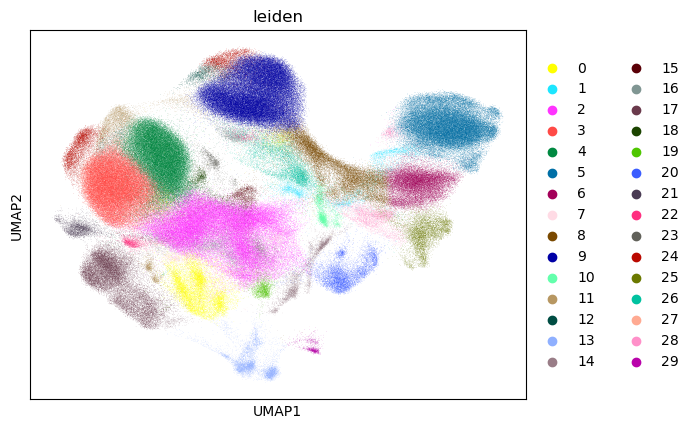

In [41]:
sc.pl.umap(adata, color=["leiden"])

## Manual cell-type annotation

In [44]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph")

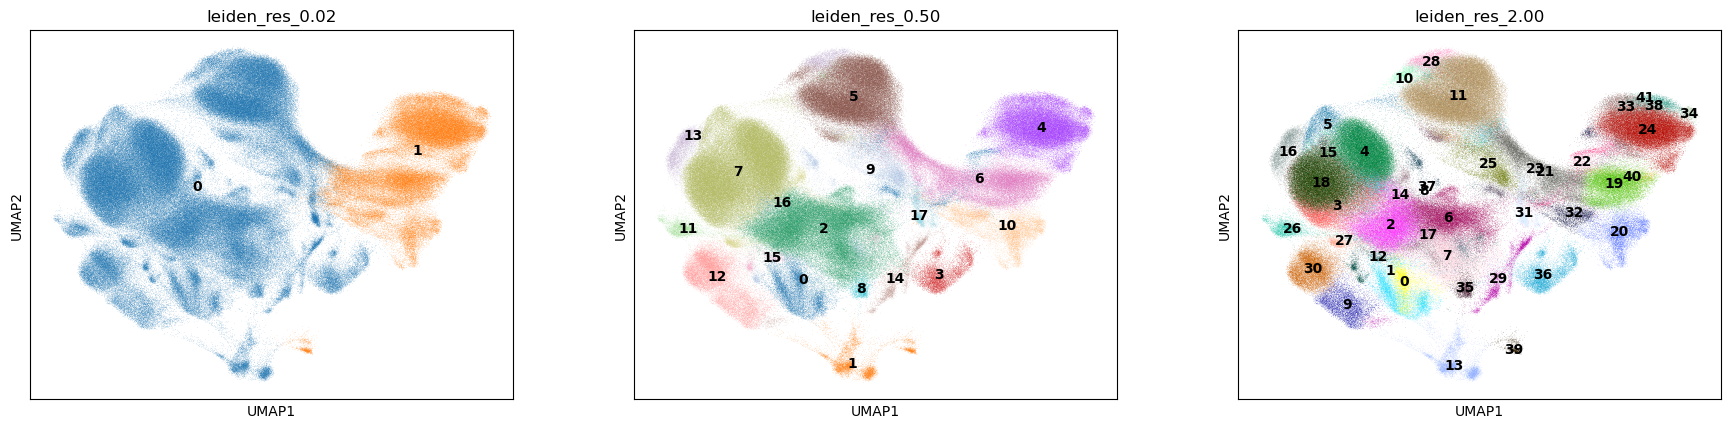

In [45]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

### Differentially-expressed Genes as Markers

In [55]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")

/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/workspace/environment/pythonscrna12/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value

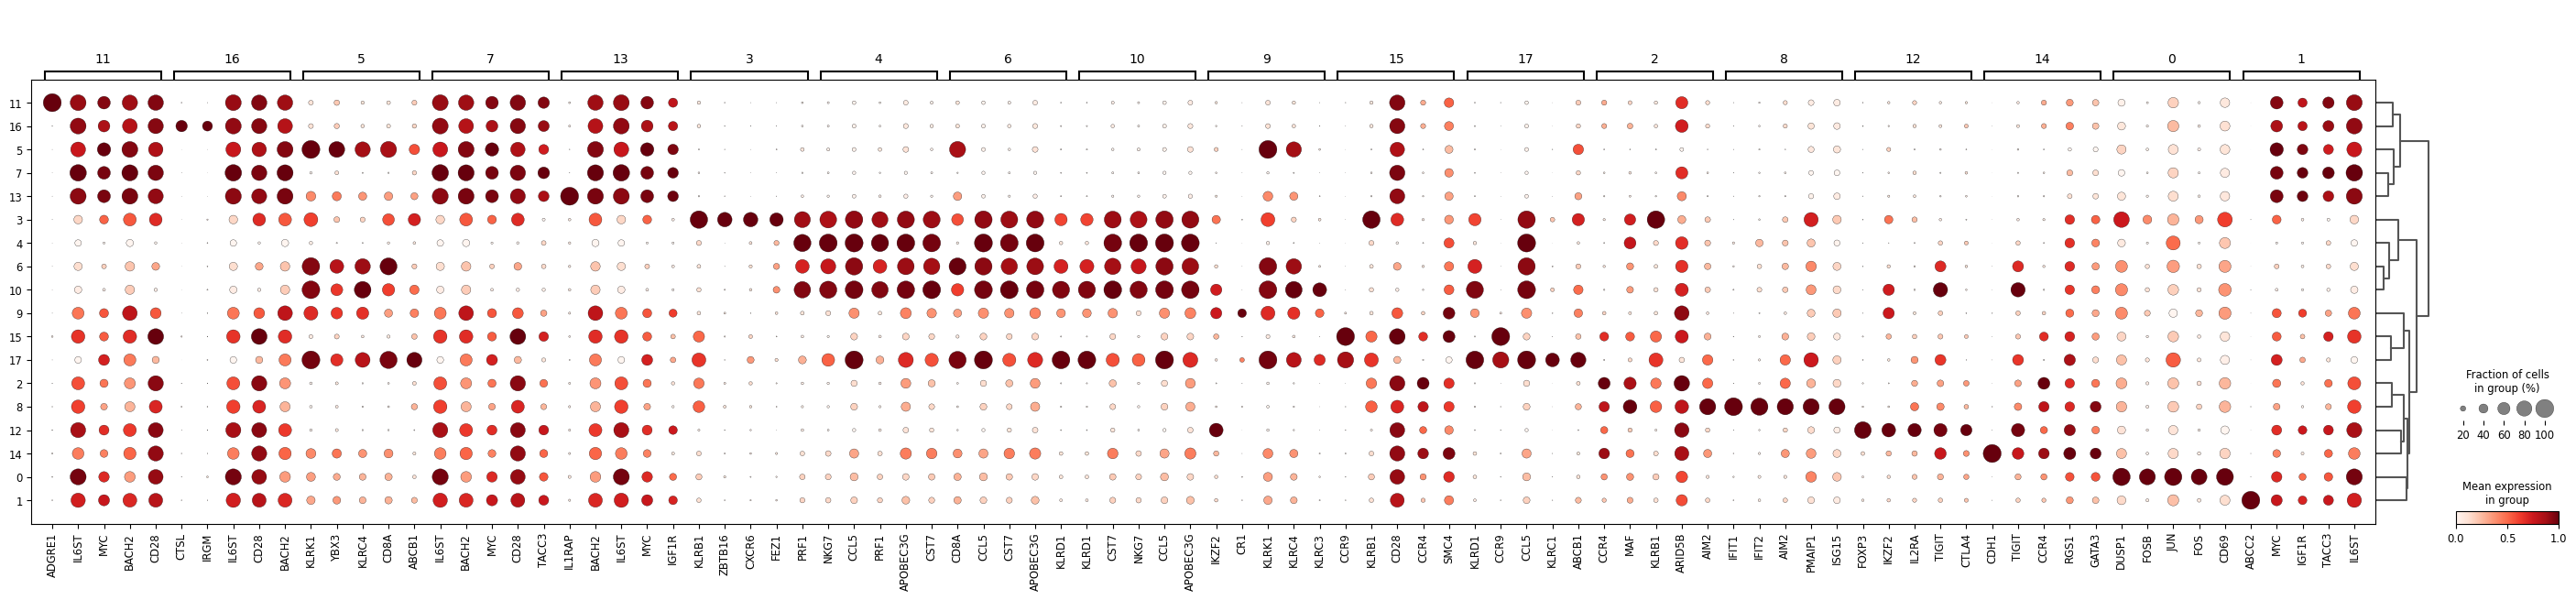

In [56]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5)

In [57]:
sc.get.rank_genes_groups_df(adata, group="7").head(5)

names      scores  logfoldchanges  pvals  pvals_adj
0  IL6ST  231.537643             NaN    0.0        0.0
1  BACH2  216.085251             NaN    0.0        0.0
2    MYC  154.478226             NaN    0.0        0.0
3   CD28  153.639481             NaN    0.0        0.0
4  TACC3  147.126099             NaN    0.0        0.0

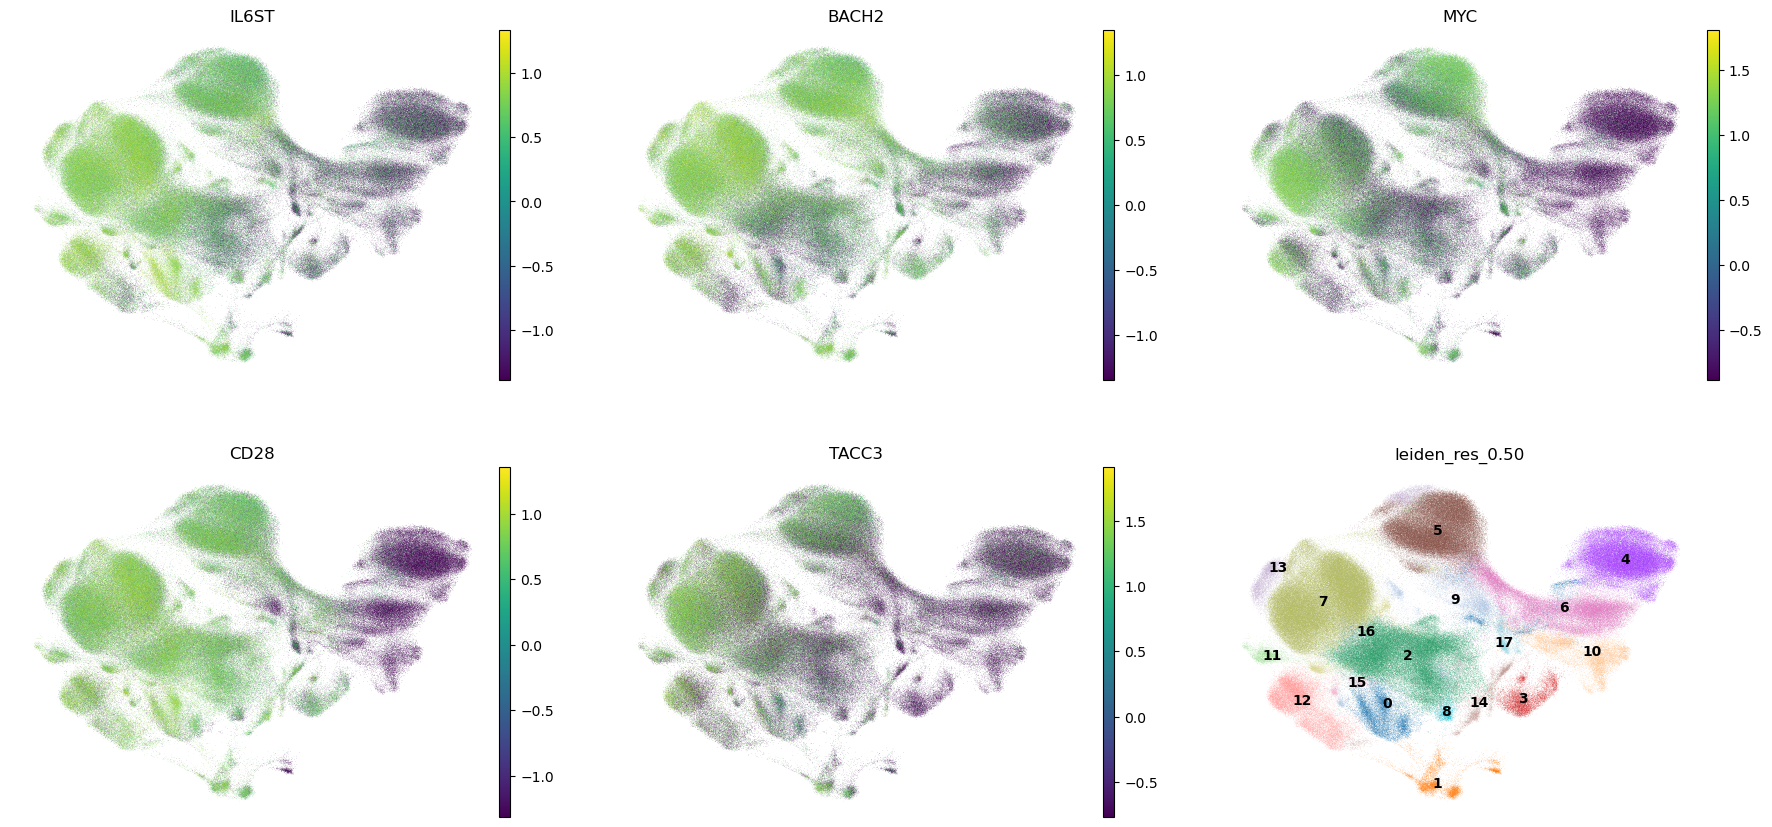

In [58]:
dc_cluster_genes = sc.get.rank_genes_groups_df(adata, group="7").head(5)["names"]
sc.pl.umap(
    adata,
    color=[*dc_cluster_genes, "leiden_res_0.50"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)